In [14]:
%pylab inline
import numpy as np
import pandas as pd
from utils import scale_by_scale_optim
from utils import scale_fitter_no_grid
from utils import utils
from utils import generate

Populating the interactive namespace from numpy and matplotlib


# Load data

In [15]:
MY_STOP_LOCATIONS_DATA = '....'

In [55]:
#Read data
stop_df = pd.read_csv('../data/laura_labeled_stops.csv')

#remove non-stationary locations and self-transitions
stop_df = stop_df[stop_df.label!=-1]
stop_df = stop_df[stop_df.label!=stop_df.label.shift()] #Note that this is not necessary
stop_df = stop_df.sort_values(by = 'start').reset_index(drop = True)


#Select the first two years of data for training
training_data = stop_df[(stop_df['start']>datetime.datetime(2015,1,1).timestamp()) & (stop_df['start']<datetime.datetime(2018,1,1).timestamp())].copy()

#Locations need to start from 0 (reindex)
locs = set(training_data['label'])
training_data['label'] = training_data['label'].map(dict(zip(locs,range(len(locs)))))


#Find stops positions
stop_locations = training_data.groupby('label')[['latitude','longitude']].median().sort_index().values
labels = training_data['label'].values.astype(int)

# Fit Parameters (by maximising likelihood)

Searching for minimum at scale 2:

    It: 0/47 | d: 3425.0 km | L: 16845.5 | p: 2: [0.02,0.98,0.00,] ,1: [0.01,0.99,0.00,] ,0: [0.00,1.00,0.00,]  | AIC: 34813.1 | ∆AIC: -6604.1
    It: 1/47 | d: 2234.6 km | L: 16708.1 | p: 2: [0.02,0.98,0.00,] ,1: [0.01,0.99,0.00,] ,0: [0.00,1.00,0.00,]  | AIC: 34540.2 | ∆AIC: -272.9
    It: 2/47 | d: 1757.7 km | L: 16621.9 | p: 2: [0.02,0.98,0.00,] ,1: [0.01,0.99,0.00,] ,0: [0.00,1.00,0.00,]  | AIC: 34369.7 | ∆AIC: -170.4
    It: 3/47 | d: 871.1 km | L: 16148.1 | p: 2: [0.03,0.97,0.00,] ,1: [0.01,0.99,0.00,] ,0: [0.00,1.00,0.00,]  | AIC: 33428.1 | ∆AIC: -941.6
    It: 4/47 | d: 716.5 km | L: 16146.9 | p: 2: [0.03,0.97,0.00,] ,1: [0.01,0.99,0.00,] ,0: [0.00,1.00,0.00,]  | AIC: 33427.8 | ∆AIC: -0.3
    It: 5/47 | d: 432.9 km | L: 15691.2 | p: 2: [0.04,0.96,0.00,] ,1: [0.01,0.99,0.00,] ,0: [0.00,1.00,0.00,]  | AIC: 32526.4 | ∆AIC: -901.4
    It: 6/47 | d: 344.3 km | L: 15668.9 | p: 2: [0.04,0.96,0.00,] ,1: [0.01,0.99,0.00,] ,0: [0.00,1.00,0.00,]  | AIC:

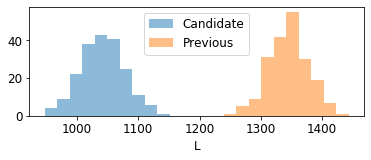

    p = 1.9426434495222354e-119
    --> Rejecting null hypothesis.

Searching for minimum at scale 3:

    It: 0/47 | d: 3425.0 km | L: 15517.6 | p: 3: [0.02,0.03,0.94,0.00,] ,2: [0.08,0.13,0.79,0.00,] ,1: [0.01,0.01,0.99,0.00,] ,0: [0.00,0.01,0.99,0.00,]  | AIC: 32213.3 | ∆AIC: -208.1
    It: 1/47 | d: 2234.6 km | L: 15506.6 | p: 3: [0.02,0.03,0.94,0.00,] ,2: [0.08,0.13,0.79,0.00,] ,1: [0.01,0.01,0.99,0.00,] ,0: [0.00,0.01,0.99,0.00,]  | AIC: 32193.2 | ∆AIC: -20.1
    It: 2/47 | d: 1757.7 km | L: 15496.8 | p: 3: [0.02,0.03,0.94,0.00,] ,2: [0.09,0.12,0.79,0.00,] ,1: [0.01,0.01,0.99,0.00,] ,0: [0.00,0.01,0.99,0.00,]  | AIC: 32175.6 | ∆AIC: -17.6
    It: 3/47 | d: 871.1 km | L: 15460.8 | p: 3: [0.03,0.03,0.94,0.00,] ,2: [0.12,0.13,0.74,0.00,] ,1: [0.01,0.01,0.99,0.00,] ,0: [0.00,0.01,0.99,0.00,]  | AIC: 32109.7 | ∆AIC: -65.9
    It: 4/47 | d: 716.5 km | L: 15460.0 | p: 3: [0.03,0.03,0.94,0.00,] ,2: [0.12,0.13,0.74,0.00,] ,1: [0.01,0.01,0.99,0.00,] ,0: [0.00,0.01,0.99,0.00,]  | AIC: 32110

    It: 46/47 | d: 39.1 m | L: 15749.9 | p: 3: [0.07,0.91,0.02,0.00,] ,2: [0.01,0.99,0.00,0.00,] ,0: [0.01,0.99,0.00,0.00,]  | AIC: 33771.8 | ∆AIC: 2071.4
    It: 47/47 | d: 32.0 m | L: 15671.8 | p: 3: [0.07,0.93,0.00,0.00,] ,2: [0.01,0.99,0.00,0.00,] ,0: [0.01,0.99,0.00,0.00,]  | AIC: 33625.7 | ∆AIC: 1925.3

Found minimum at   d: 2.5 km
                   L: 15147.2
                 AIC: 31700.4

Result of statistical test:


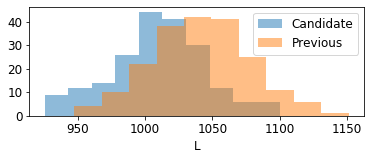

    p = 6.5689645859369454e-12
    --> Rejecting null hypothesis.

Searching for minimum at scale 4:

    It: 0/47 | d: 3425.0 km | L: 15040.6 | p: 4: [0.02,0.03,0.36,0.58,0.00,] ,3: [0.08,0.13,0.23,0.56,0.00,] ,2: [0.01,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.52,0.48,0.00,] ,0: [0.00,0.01,0.66,0.33,0.00,]  | AIC: 31495.2 | ∆AIC: -205.2
    It: 1/47 | d: 2234.6 km | L: 15029.6 | p: 4: [0.02,0.03,0.36,0.58,0.00,] ,3: [0.08,0.13,0.23,0.56,0.00,] ,2: [0.01,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.52,0.48,0.00,] ,0: [0.00,0.01,0.66,0.33,0.00,]  | AIC: 31475.2 | ∆AIC: -20.1
    It: 2/47 | d: 1757.7 km | L: 15020.5 | p: 4: [0.02,0.03,0.36,0.58,0.00,] ,3: [0.09,0.12,0.25,0.55,0.00,] ,2: [0.01,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.52,0.48,0.00,] ,0: [0.00,0.01,0.66,0.33,0.00,]  | AIC: 31459.1 | ∆AIC: -16.1
    It: 3/47 | d: 871.1 km | L: 14985.5 | p: 4: [0.03,0.03,0.36,0.58,0.00,] ,3: [0.12,0.13,0.26,0.49,0.00,] ,2: [0.01,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.52,0.48,0.00,] ,0: [0.00,0.01,0.66,

    It: 38/47 | d: 177.5 m | L: 15362.2 | p: 4: [0.07,0.35,0.23,0.34,0.00,] ,3: [0.02,0.65,0.28,0.06,0.00,] ,2: [0.01,0.59,0.39,0.01,0.00,] ,1: [0.00,0.12,0.04,0.84,0.00,] ,0: [0.01,0.66,0.22,0.12,0.00,]  | AIC: 32910.4 | ∆AIC: 1515.4
    It: 39/47 | d: 147.0 m | L: 15444.3 | p: 4: [0.07,0.35,0.34,0.24,0.00,] ,3: [0.02,0.65,0.29,0.04,0.00,] ,2: [0.01,0.59,0.39,0.01,0.00,] ,1: [0.00,0.12,0.04,0.84,0.00,] ,0: [0.01,0.66,0.22,0.12,0.00,]  | AIC: 33124.5 | ∆AIC: 1729.5
    It: 40/47 | d: 122.1 m | L: 15466.5 | p: 4: [0.07,0.35,0.36,0.22,0.00,] ,3: [0.02,0.65,0.30,0.04,0.00,] ,2: [0.01,0.59,0.39,0.01,0.00,] ,1: [0.00,0.12,0.04,0.84,0.00,] ,0: [0.01,0.66,0.22,0.12,0.00,]  | AIC: 33231.0 | ∆AIC: 1836.0
    It: 41/47 | d: 100.7 m | L: 15453.2 | p: 4: [0.07,0.35,0.38,0.20,0.00,] ,3: [0.02,0.65,0.30,0.03,0.00,] ,2: [0.01,0.59,0.39,0.01,0.00,] ,1: [0.00,0.12,0.04,0.84,0.00,] ,0: [0.01,0.66,0.22,0.12,0.00,]  | AIC: 33234.3 | ∆AIC: 1839.3
    It: 42/47 | d: 83.7 m | L: 15459.0 | p: 4: [0.07,0.35,0.

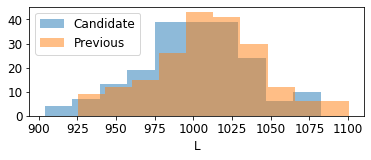

    p = 0.011843449760085422
    --> Rejecting null hypothesis.

Searching for minimum at scale 5:

    It: 0/47 | d: 3425.0 km | L: 14965.1 | p: 5: [0.02,0.00,0.03,0.36,0.58,0.00,] ,4: [0.00,0.08,0.04,0.20,0.69,0.00,] ,3: [0.12,0.00,0.13,0.26,0.49,0.00,] ,2: [0.01,0.00,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.00,0.52,0.48,0.00,] ,0: [0.00,0.00,0.01,0.66,0.33,0.00,]  | AIC: 31362.3 | ∆AIC: -32.7
    It: 1/47 | d: 2234.6 km | L: 14965.3 | p: 5: [0.02,0.00,0.03,0.36,0.58,0.00,] ,4: [0.00,0.08,0.04,0.20,0.69,0.00,] ,3: [0.12,0.00,0.13,0.26,0.49,0.00,] ,2: [0.01,0.00,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.00,0.52,0.48,0.00,] ,0: [0.00,0.00,0.01,0.66,0.33,0.00,]  | AIC: 31364.5 | ∆AIC: 2.3
    It: 2/47 | d: 1757.7 km | L: 14968.9 | p: 5: [0.02,0.00,0.03,0.36,0.58,0.00,] ,4: [0.00,0.08,0.00,0.22,0.69,0.00,] ,3: [0.12,0.00,0.13,0.26,0.49,0.00,] ,2: [0.01,0.00,0.01,0.65,0.33,0.00,] ,1: [0.00,0.00,0.00,0.52,0.48,0.00,] ,0: [0.00,0.00,0.01,0.66,0.33,0.00,]  | AIC: 31373.8 | ∆AIC: 11.5
    It: 4/47

    It: 32/47 | d: 550.4 m | L: 15227.8 | p: 5: [0.03,0.03,0.36,0.16,0.43,0.00,] ,4: [0.12,0.13,0.26,0.06,0.43,0.00,] ,3: [0.01,0.01,0.65,0.09,0.24,0.00,] ,2: [0.00,0.01,0.62,0.31,0.06,0.00,] ,1: [0.00,0.00,0.49,0.05,0.45,0.00,] ,0: [0.00,0.01,0.66,0.05,0.29,0.00,]  | AIC: 32377.5 | ∆AIC: 1046.4
    It: 33/47 | d: 458.6 m | L: 15195.7 | p: 5: [0.03,0.03,0.36,0.17,0.42,0.00,] ,4: [0.12,0.13,0.26,0.06,0.43,0.00,] ,3: [0.01,0.01,0.65,0.23,0.10,0.00,] ,2: [0.00,0.01,0.62,0.32,0.05,0.00,] ,1: [0.00,0.00,0.49,0.05,0.45,0.00,] ,0: [0.00,0.01,0.66,0.05,0.29,0.00,]  | AIC: 32361.4 | ∆AIC: 1030.2
    It: 34/47 | d: 381.2 m | L: 15078.7 | p: 5: [0.03,0.03,0.36,0.17,0.41,0.00,] ,4: [0.12,0.13,0.26,0.06,0.43,0.00,] ,3: [0.01,0.01,0.65,0.24,0.09,0.00,] ,2: [0.00,0.01,0.71,0.23,0.05,0.00,] ,1: [0.00,0.00,0.18,0.12,0.70,0.00,] ,0: [0.00,0.01,0.66,0.09,0.24,0.00,]  | AIC: 32161.3 | ∆AIC: 830.2
    It: 35/47 | d: 314.6 m | L: 15096.1 | p: 5: [0.03,0.03,0.36,0.21,0.38,0.00,] ,4: [0.12,0.13,0.26,0.08,0.41

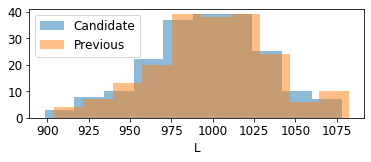

    p = 0.7933622419382523
    --x Cannot reject null hypothesis.

Could not improve beyond scale 4. Optimization ends.


In [56]:
#Run maximum likelihood optimization
optim_instance = scale_by_scale_optim.ScalesOptim(labels, 
                                                  stop_locations,
                                                  bootstrap = True,
                                                  min_dist=1.2, 
                                                  siglvl=0.4)
final_series, _, likelihoods, _, final_sizes, _, _ = optim_instance.find_best_scale()

In [57]:
from collections import defaultdict
series = np.array(final_series)
stop_labels = stop_locations
series = series[:-1][(series[:-1]!=series[1:]).any(axis = 1)]

# Get the hierarchy of cells that we want to plot
container_labels = utils.get_container_labels(series)
n_scales = len(series[0])



# Convert each cell to a convex hull
cell_hulls = defaultdict(dict)
for cell, stop_labels in container_labels.items():
    points = [stop_locations[label] for label in stop_labels]
    while True:
        try:
            cell_hulls[n_scales-len(cell)+1][cell] = utils.convex_hull(np.array(points))
            break
        except: # QhullError
            points.append(points[-1] + (np.random.random(size=2)-0.5) * 1e-4)

In [58]:
ls2 = defaultdict(list)
for item in cell_hulls.items():
    for item2 in item[1].items():
        ls2[item[0]].append(utils.haversine_pdist(item2[1]).max())

In [105]:
import matplotlib as mpl
def setup_mpl():
    mpl.rc('font', size=12)
    mpl.rcParams['legend.fontsize'] = 'small'
    mpl.rcParams['legend.fontsize'] = 'small'
    mpl.rcParams['xtick.labelsize'] = 'small'
    mpl.rcParams['ytick.labelsize'] = 'small'
    mpl.rcParams['font.family']='Helvetica 45 Light'

    mpl.rcParams['lines.linewidth'] = 1
    mpl.rcParams['xtick.major.width'] = 1
    mpl.rcParams['ytick.major.width'] = 1
    mpl.rcParams['xtick.minor.width'] = 1
    mpl.rcParams['ytick.minor.width'] = 1
    mpl.rcParams['xtick.major.size'] = 3
    mpl.rcParams['ytick.major.size'] = 3
    mpl.rcParams['xtick.minor.size'] = 1.5
    mpl.rcParams['ytick.minor.size'] = 1.5
    mpl.rcParams['axes.linewidth'] = 1
    mpl.rcParams['ytick.direction'] = 'in'
    mpl.rcParams['xtick.direction'] = 'in'
    mpl.rcParams['xtick.top']=True
    mpl.rcParams['ytick.right']=True
    mpl.rcParams['mathtext.default']='regular'
    mpl.rcParams['xtick.major.pad']='2.3'
    mpl.rcParams['ytick.major.pad']='2.3'
    mpl.rcParams['axes.labelpad']= 2
    mpl.rcParams['figure.dpi'] = 400

    to_rgba = mpl.colors.ColorConverter().to_rgba
setup_mpl()

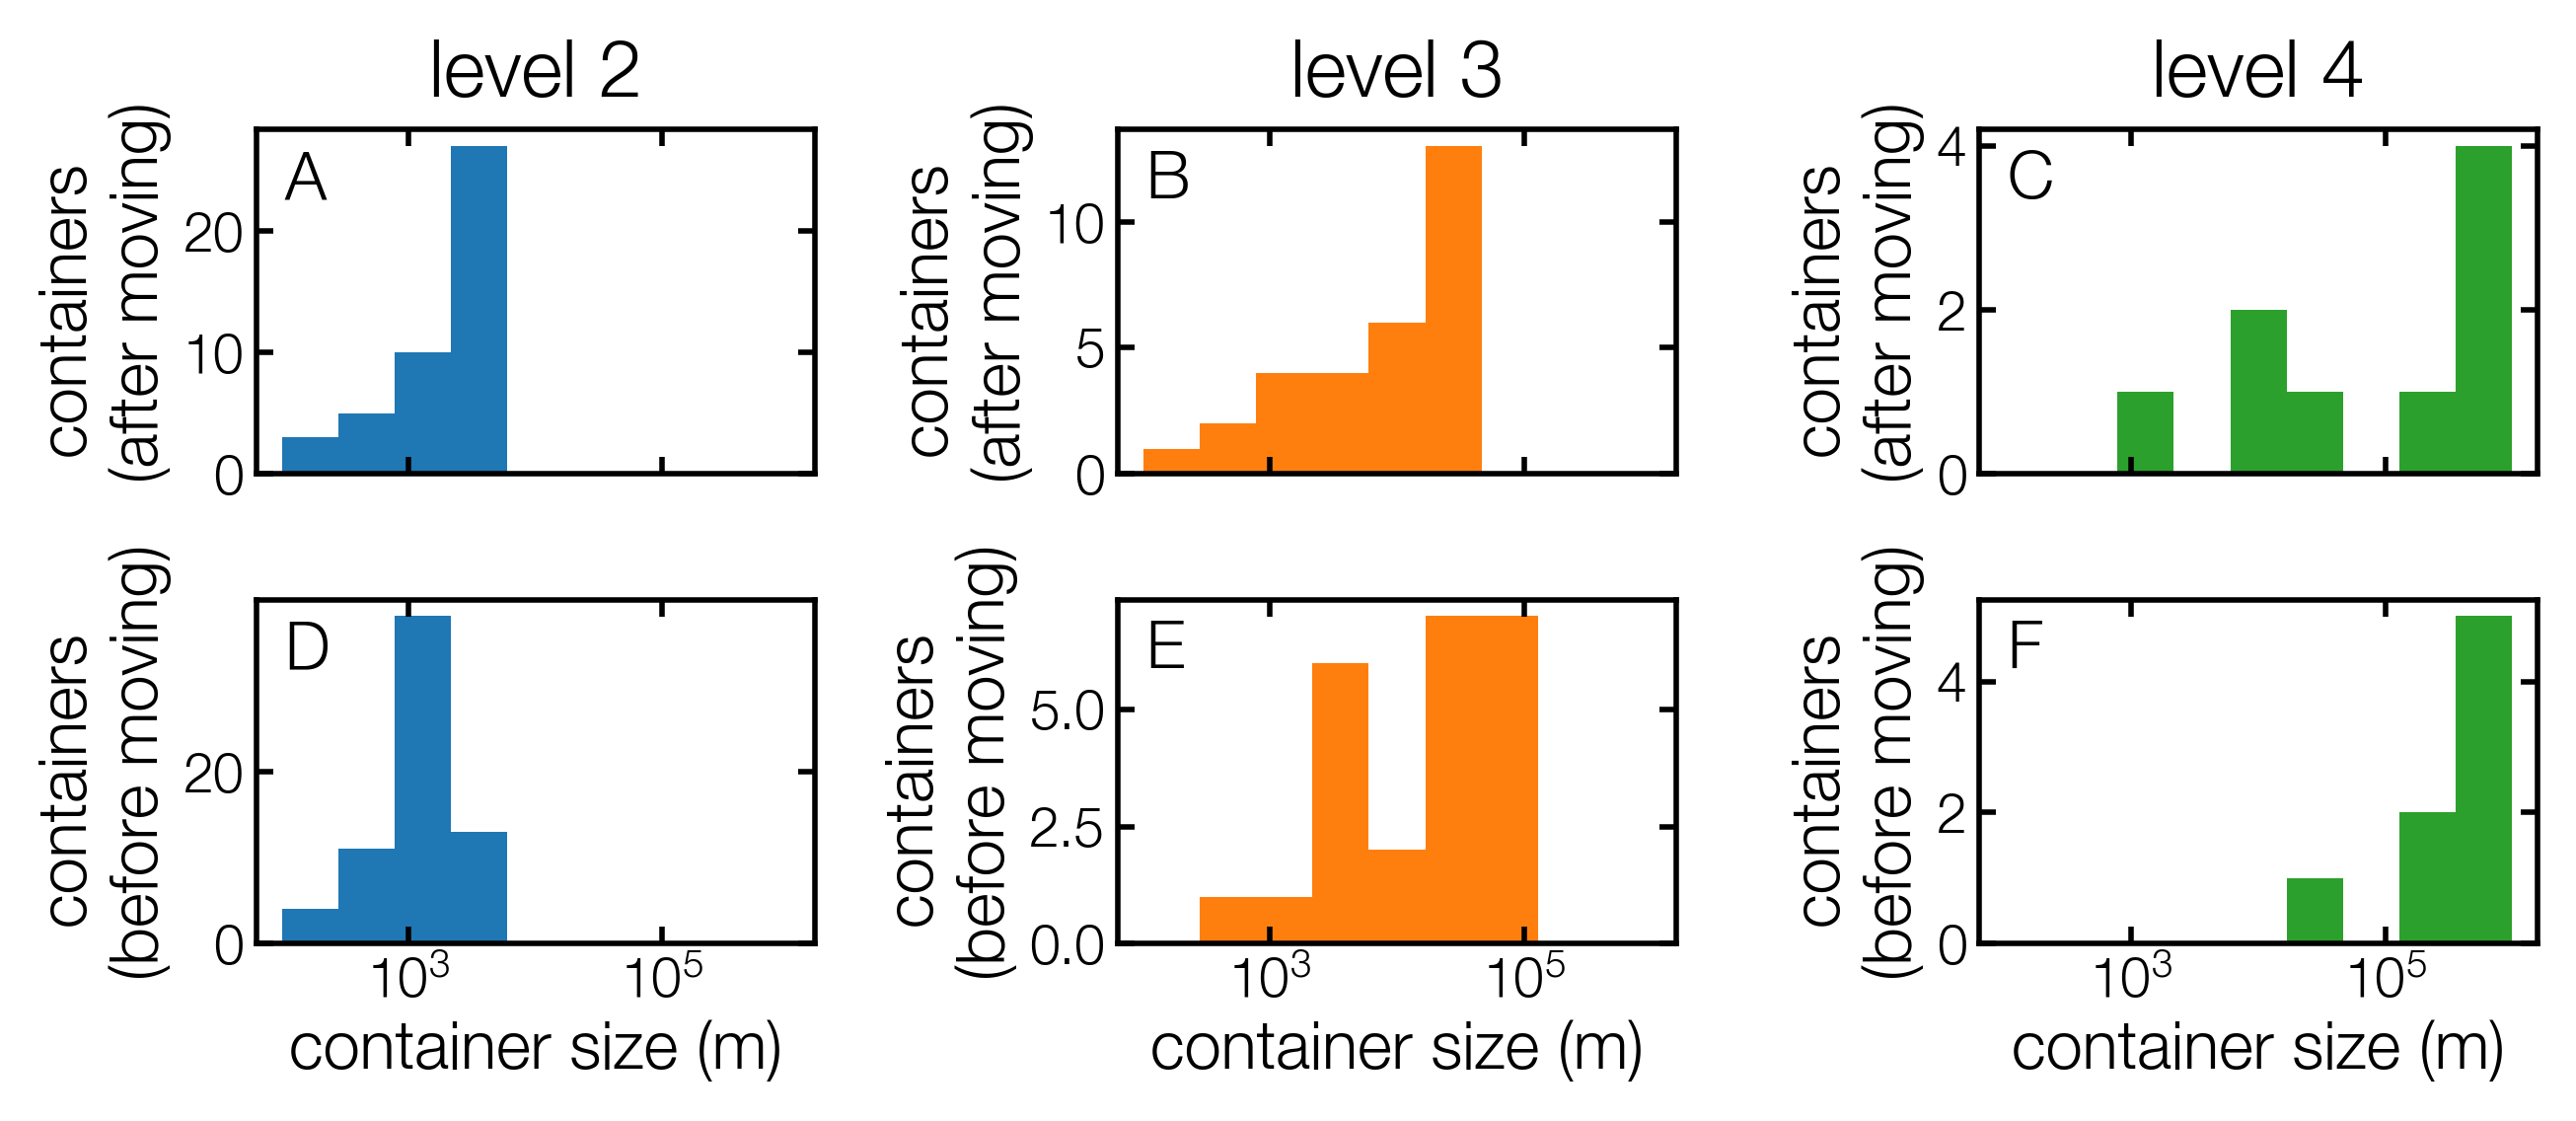

In [106]:
fig, ax = plt.subplots(2,3,figsize=(6.69,3),sharex='col')

ax[0][2].set_title('level 4')
ax[1][2].set_xlabel('container size (m)')

ax[0][2].hist(ls[4],bins =np.logspace(2,6,10),color = 'C2')
ax[1][2].hist(ls2[4],bins =np.logspace(2,6,10),color = 'C2')
ax[0][2].set_xscale('log')
ax[1][2].set_ylabel('containers \n (before moving)')
ax[0][2].set_ylabel('containers \n (after moving)')


ax[0][1].set_title('level 3')

ax[0][1].hist(ls[3],bins =np.logspace(2,6,10),color = 'C1')
ax[1][1].hist(ls2[3],bins =np.logspace(2,6,10),color = 'C1')
ax[0][1].set_xscale('log')
ax[1][1].set_xlabel('container size (m)')
ax[1][1].set_ylabel('containers \n (before moving)')
ax[0][1].set_ylabel('containers \n (after moving)')


ax[0][0].set_title('level 2')

ax[0][0].hist(ls[2],bins =np.logspace(2,6,10),color = 'C0')
ax[1][0].hist(ls2[2],bins =np.logspace(2,6,10),color = 'C0')
ax[0][0].set_xscale('log')
ax[1][0].set_xlabel('container size (m)')
ax[1][0].set_ylabel('containers \n (before moving)')
ax[0][0].set_ylabel('containers \n (after moving)')

import string
for n, a in enumerate(flatten(ax)):

    a.text(0.05, 0.8, string.ascii_uppercase[n], transform=a.transAxes)
    
fig.tight_layout()

# Visualize results

In [60]:
import numpy as np
utils.plot_solution_on_world_map(np.array(final_series), stop_locations)

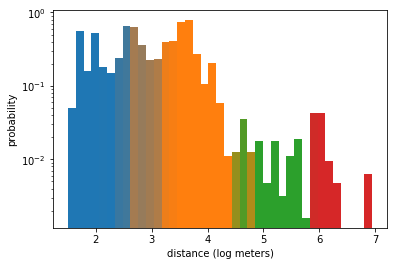

In [61]:
plt.figure()
utils.plot_scales_histogram(final_series, stop_locations)
plt.xlabel('distance (log meters)')
plt.ylabel('probability')
plt.show()

Text(0, 0.5, '-log L')

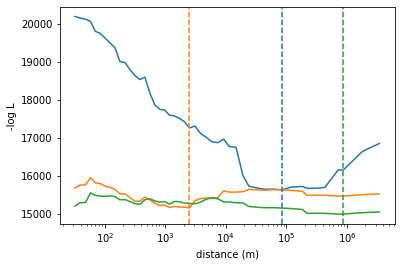

In [62]:
plt.figure()
for key, values in sorted(likelihoods.items(), key = lambda x:x[0]):
    x,y = zip(*values)
    plt.plot(x,y, color = 'C{}'.format(key-2))
for key, values in sorted(final_sizes.items(), key = lambda x:x[0]):
    plt.axvline(values, color = 'C{}'.format(key-2), ls = '--')
plt.xscale('log')
plt.xlabel('distance (m)')
plt.ylabel('-log L')

# Generate new data

In [7]:
from joblib import Parallel, delayed

In [8]:
#recover parameters
nested_dictionary, cell_p_change = generate.recover_parameters_from_fitted_trace(final_series)

new_trace = generate.generate_trace(nested_dictionary, cell_p_change, 1000, initial_position=final_series[-1])

In [9]:
#Generate 100 Synthetic traces
new_traces = Parallel(n_jobs=2)(delayed(generate.generate_trace)(nested_dictionary, cell_p_change, 1000, initial_position=final_series[-1]) for i in range(100))